In [38]:
import json 
import numpy as np
from tqdm import tqdm_notebook
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import json

In [39]:
model = 'gpt2'
filter = 'filtered'
split = 'dev'
dataset = 'winobias'
top_heads = [(5,8), (5,10), (4,6), (5,9), (6,0)]
transposed = list(zip(*top_heads))
head_filter = (np.array(transposed[0]), np.array(transposed[1]))
print(head_filter)


# Plot y_{set-gender,z_set-gender}(u) - y_{set-gender,z_null(u)}(u) by
#  	 y_{null,z_set-gender(u)}(u) -  y_{null,z_null} (u)

fname = f"{dataset}_data/attention_intervention_{model}_{filter}_{split}.json"
with open(fname) as f:
	data = json.load(f)
x = []
y = []

for result in data['results']:
	y_null_z_set_gender = np.array(result['indirect_odds_head'])[head_filter]
	y_null_z_null = np.array(result['odds_base'])
	x.extend((y_null_z_set_gender - y_null_z_null).flatten().tolist())
	y_set_gender_z_set_gender = np.array(result['odds_alt'])
	y_set_gender_z_null = np.array(result['direct_odds_head'])[head_filter]
	y.extend((y_set_gender_z_set_gender - y_set_gender_z_null).flatten().tolist())
	
assert len(x) == len(y) == 5 * len(data['results'])
x = np.array(x)
y = np.array(y)



(array([5, 5, 4, 5, 6]), array([ 8, 10,  6,  9,  0]))


CUTOFF 5
0.59540
0.8533200257189758


/anaconda3/envs/lmint/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


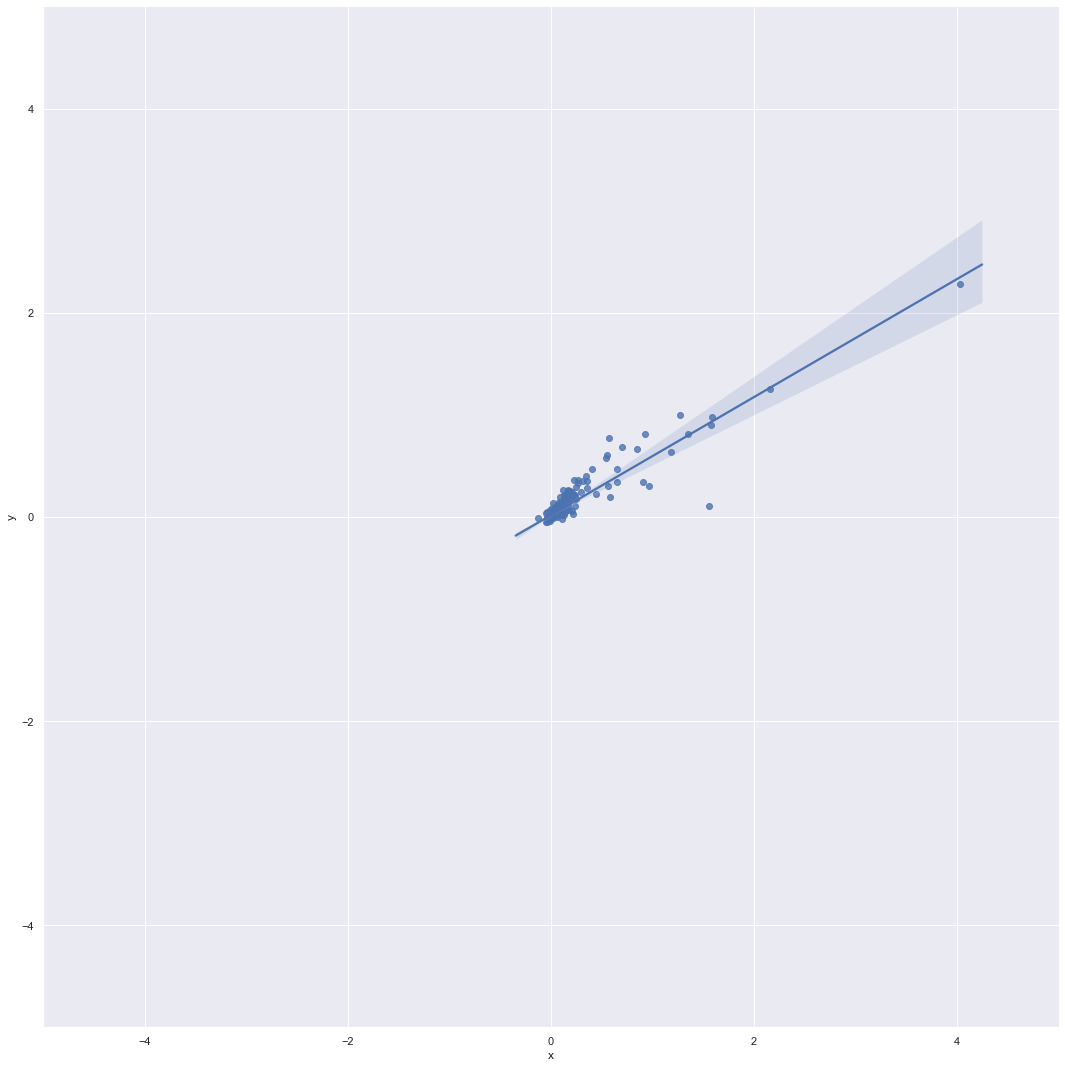

In [40]:
# data = np.array(zip(x, y))
cutoff = 5
print('CUTOFF', cutoff)
box = np.where((x < cutoff) & (x > -cutoff) & (y < cutoff) & (y > -cutoff))
y_box = y[box]
x_box = x[box]
X = x_box.reshape(-1, 1)
Y = y_box.reshape(-1, 1)
reg = LinearRegression(fit_intercept=False).fit(X, Y)
print(f"{reg.coef_[0].item():.5f}")#, {reg.intercept_:.5f}")
print(reg.score(X, Y))

df = pd.DataFrame({'x': x_box, 'y': y_box})
# fig, ax = plt.subplots(figsize=(20,20))
# g = sns.lmplot(x='x', y='y', data=df, scatter_kws={"s": .2})
g = sns.lmplot(x='x', y='y', data=df, size=15, aspect=1)
g.set(xlim=(-cutoff, cutoff))
g.set(ylim=(-cutoff, cutoff))

CUTOFF 1
0.76894
0.7777807274020568


/anaconda3/envs/lmint/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


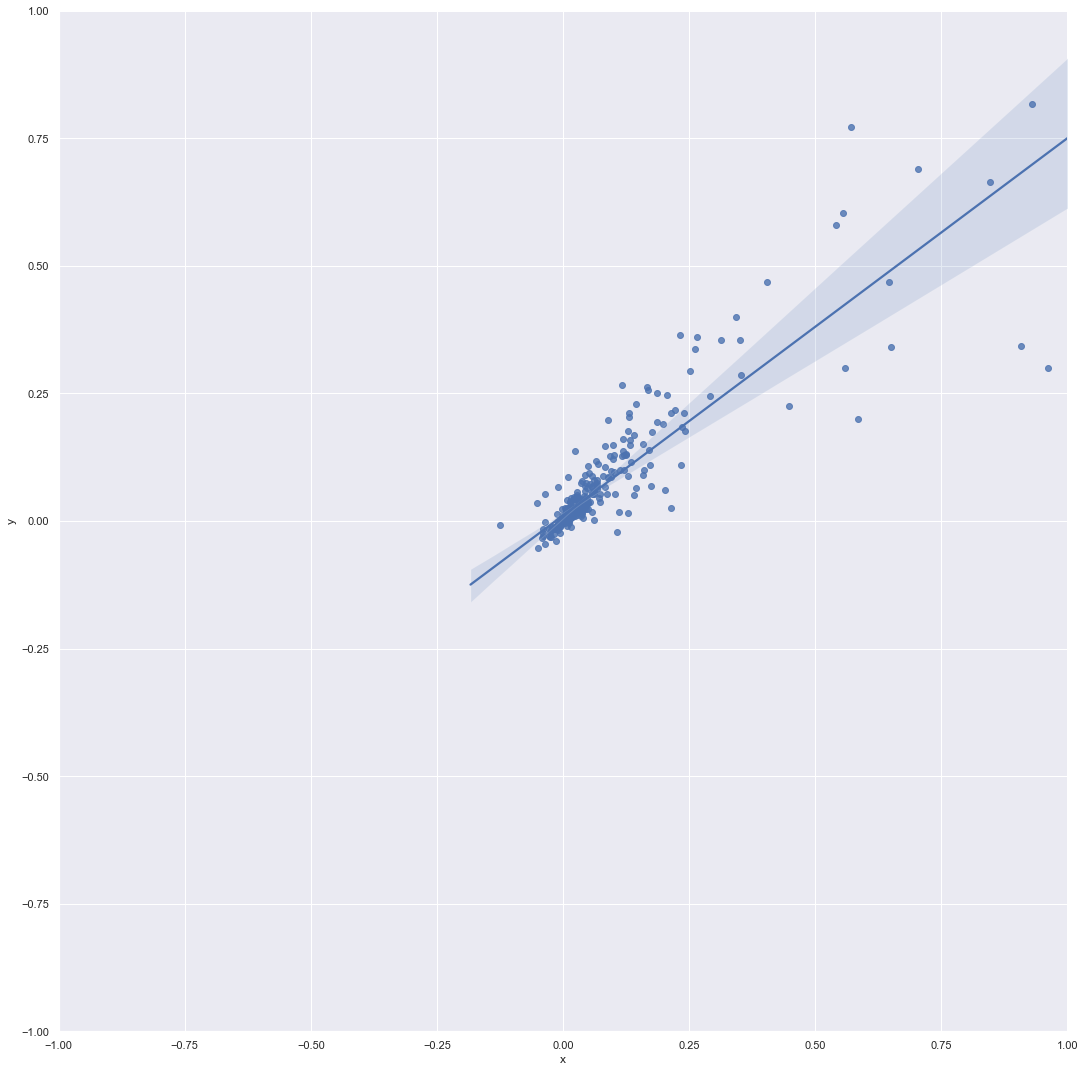

In [41]:
# data = np.array(zip(x, y))
cutoff = 1
print('CUTOFF', cutoff)
box = np.where((x < cutoff) & (x > -cutoff) & (y < cutoff) & (y > -cutoff))
y_box = y[box]
x_box = x[box]
X = x_box.reshape(-1, 1)
Y = y_box.reshape(-1, 1)
reg = LinearRegression(fit_intercept=False).fit(X, Y)
print(f"{reg.coef_[0].item():.5f}")#, {reg.intercept_:.5f}")
print(reg.score(X, Y))

df = pd.DataFrame({'x': x_box, 'y': y_box})
# fig, ax = plt.subplots(figsize=(20,20))
# g = sns.lmplot(x='x', y='y', data=df, scatter_kws={"s": .2})
g = sns.lmplot(x='x', y='y', data=df, size=15, aspect=1)
g.set(xlim=(-cutoff, cutoff))
g.set(ylim=(-cutoff, cutoff))

CUTOFF 0.1
0.91556
0.665417004209031


/anaconda3/envs/lmint/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


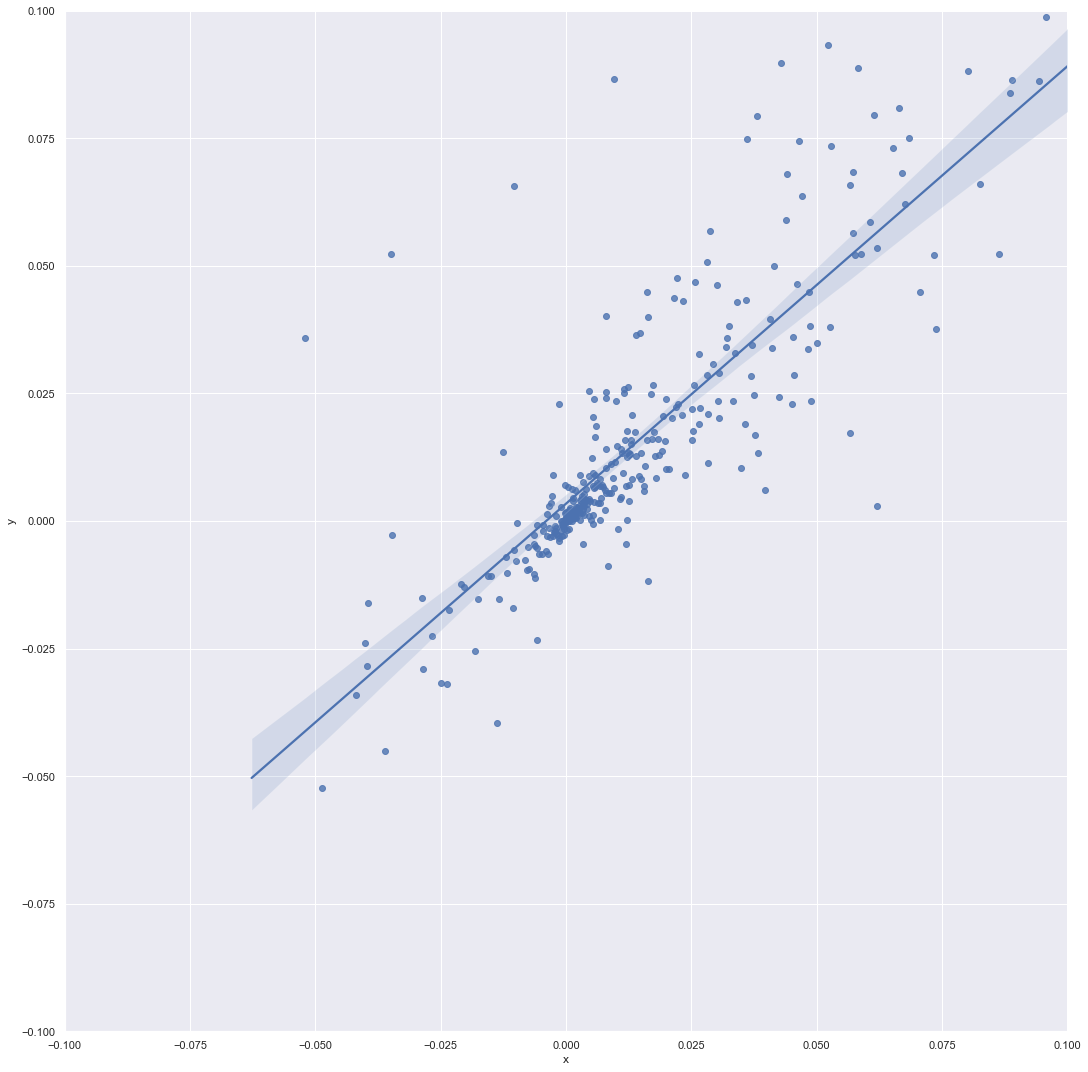

In [42]:
# data = np.array(zip(x, y))
cutoff = .1
print('CUTOFF', cutoff)
box = np.where((x < cutoff) & (x > -cutoff) & (y < cutoff) & (y > -cutoff))
y_box = y[box]
x_box = x[box]
X = x_box.reshape(-1, 1)
Y = y_box.reshape(-1, 1)
reg = LinearRegression(fit_intercept=False).fit(X, Y)
print(f"{reg.coef_[0].item():.5f}")#, {reg.intercept_:.5f}")
print(reg.score(X, Y))

df = pd.DataFrame({'x': x_box, 'y': y_box})
# fig, ax = plt.subplots(figsize=(20,20))
# g = sns.lmplot(x='x', y='y', data=df, scatter_kws={"s": .2})
g = sns.lmplot(x='x', y='y', data=df, size=15, aspect=1)
g.set(xlim=(-cutoff, cutoff))
g.set(ylim=(-cutoff, cutoff))


